Transformada de Hough

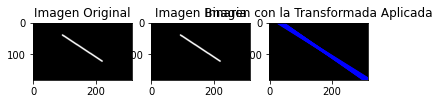

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import cv2

def transformadaHough(tStep, rStep, lineTries):
    # Esta funcion aplica la transformada de Hough a una imagen a escala de grises
    # con tal de obtener las lineas de esta

    fig, ax = plt.subplots(1, 3)

    A = cv2.imread('../Imagenes/linea1.jpg', cv2.IMREAD_GRAYSCALE)
    m, n = A.shape
    ax[0].imshow(A, cmap='gray')
    ax[0].set_title('Imagen Original')

    B = cv2.normalize(A.astype('double'), None, 0.0, 1.0, cv2.NORM_MINMAX)
    B[np.less(B, 0.5)] = 0
    B[np.greater_equal(B, 0.5)] = 1
    ax[1].imshow(B, cmap='gray')
    ax[1].set_title('Imagen Binaria')

    thetas = np.deg2rad(np.arange(start=0, stop=180, step=tStep))

    d = np.sqrt(np.power(m, 2) + np.power(n, 2))
    rhos = np.arange(start=-d, stop=d, step=rStep)

    Acc = np.zeros((thetas.size, rhos.size))

    x, y = np.where(B == 1)
    
    for i in range(x.size):
        for ti in range(thetas.size):
            theta = thetas[ti]
            rho = (x[i] * np.cos(theta)) + (y[i] * np.sin(theta))
            rho = np.abs(np.subtract(rhos, rho))
            
            ri = np.where(rho == np.amin(rho))
            Acc[ti, ri[0][0]] += 1

    ax[2].set_title('Imagen con la Transformada Aplicada')

    for r in range(lineTries):
        xp, yp = np.where(Acc == np.amax(Acc))

        for k in range(xp.size):
            thetaMax = thetas[xp[0]]
            rhoMax = rhos[yp[0]]

            if (np.abs(np.sin(thetaMax)) < 10**-4):
                xv = rhoMax / np.cos(thetaMax)
                ax[2].plot([n, 1], [xv, xv], color="blue", linewidth=2)

            else:
                pend = -1 * np.cos(thetaMax) / np.sin(thetaMax)
                inter = rhoMax / np.sin(thetaMax)

                y1 = pend + inter
                ym = (pend * m) + inter

                x1 = (1 - inter) / pend
                xn = (n - inter) / pend

                if (pend > 0):
                    if (0 < y1):
                        ax[2].plot([y1, n], [1, xn], color="blue", linewidth=2)
                    else:
                        ax[2].plot([1, ym], [x1, n], color="blue", linewidth=2)
                
                else:
                    if (y1 > m):
                        ax[2].plot([ym, m], [m, xn], color="blue", linewidth=2)
                    else:
                        ax[2].plot([y1, 1], [1, x1], color="blue", linewidth=2)

            Acc[xp[k], yp[k]] = 0

    ax[2].invert_yaxis()
    ax[2].imshow(A, cmap='gray')
    plt.show()

    return

# Ejemplo
transformadaHough(1, 1, 10)